# Population in Ireland

### Data preparation and Visualization
1. You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained. [0-20]

#### 1 Importing Libraries and Declaring functions

### Programming  
1. The project must be explored programmatically, this means that you must implement suitable Python tools (code and/or libraries) to complete the analysis required. All of this is to be implemented in a Jupyter Notebook. Your codebook should be properly annotated. The project documentation must include sound justifications and explanation of your code choices (code quality standards should also be applied). [0-50]

In [1]:
#import library packages
import numpy as np
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

#import own library
#from mylibrary import mylibrary

In [2]:
# Plot a bar with seaborn
def plotBarWithSeaborn(df_data, x_name, y_name, title, axis_x_name, axis_y_name, rotation = False, hue_ = None,legend_t = None):    
    g = sns.catplot(
        x=x_name,       # x variable name
        y=y_name,       # y variable name
        data=df_data,     # dataframe to plot
        kind="bar",
        hue =hue_
    )
    plt.title(title)
    plt.xlabel(axis_x_name)
    plt.ylabel(axis_y_name)
    
    if rotation :        
        plt.xticks(rotation=90)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    #plt.tight_layout()
    if legend_t != None:
        sns.move_legend(g, "upper center", bbox_to_anchor=(1, 1), title=legend_t)

    plt.show()

In [3]:
#get outliers by feature
def get_outliers_by_feature(df, feature):
    """get outliers dataframe by feature and plotting the graphics of boxplots before and after
    Args:
            df (Dataframe): [Dataset]
            feature (str): [column]
    """
    # Group by Council
    df_population_2022_by = df.groupby(feature).sum("Value")
    
    # show outliers
    sns.boxplot(x=df_population_2022_by['Value']) 
    plt.title("")
    plt.xlabel('County')
    plt.ylabel('Population')
    plt.show()
    
    # calculating quartiles
    Q1 = df_population_2022_by['Value'].quantile(0.25)
    Q3 = df_population_2022_by['Value'].quantile(0.75) 

    print("Calculating quartiles") 
    print(f"Quartile 3 = {Q3}") 
    print(f"Quartile 1 = {Q1}") 
    
    IQR = Q3 - Q1
    print(f"IQR = {IQR}") 
    
    # print outliers
    df_atypical = df_population_2022_by[((df_population_2022_by['Value'] < (Q1 - 1.5 * IQR)) |(df_population_2022_by['Value'] > (Q3 + 1.5 * IQR)))]
    
    # removing outliers
    df_without_atypical = df_population_2022_by[~((df_population_2022_by['Value'] < (Q1 - 1.5 * IQR)) |(df_population_2022_by['Value'] > (Q3 + 1.5 * IQR)))]
    df_without_atypical.shape
    
    sns.boxplot(x=df_without_atypical['Value']) 
    plt.show()
    print("Outliers")
    return df_atypical

In [4]:
def get_joined_df_by_county(df_data, county):
    if county == "Limerick":
        county_name_1 = county
        county_name_2 = "Limerick City"
    else: 
        if county == "Tipperary":
            county_name_1 = "North Tipperary"
            county_name_2 = "South Tipperary"
        else:
            county_name_1 = county
            county_name_2 = "Waterford City"
            
    # get the rows for joining
    df_population_county = df_data.loc[(df_data["County"] == county_name_1) | (df_data["County"] == county_name_2)]
    
    if county != "Tipperary": 
        df_population_county['County'] = df_population_county['County'].str.replace(' City', '')
    else:
        df_population_county['County'] = df_population_county['County'].str.replace('North ', '')
        df_population_county['County'] = df_population_county['County'].str.replace('South ', '')
    
    df_population_county = df_population_county.groupby(["Year","County","Age","Sex"]).sum("Value")
    df_population_county = df_population_county.reset_index()
    #Deleting old values
    df_data = df_data.loc[(df_data["County"] != county_name_1) & (df_data["County"] != county_name_2)]
    
    
    df_data = pd.concat([df_data, df_population_county], axis=0)
    return df_data
    

In [5]:
def get_joined_df_by_ages(df_data, ages):
    # get the rows for joining
    df_population_ages = df_data.loc[(df_population_2011["Age"].isin(ages))]
    df_population_ages = df_population_ages.groupby(["Year","County","Sex"]).sum("Value")
    df_population_ages = df_population_ages.reset_index()
    
    last_age = [int(i) for i in ages[4].split() if i.isdigit()][0]
    label_age = ages[0] + "-"+ str(last_age)
    values = [label_age] * df_population_ages.shape[0]
    
    # inserting new column
    df_population_ages.insert(2, "Age", values, True)
    
    # deleting old values
    df_data = df_data.loc[~(df_data["Age"].isin(ages))]
    
    
    df_data = pd.concat([df_data, df_population_ages], axis=0)

    return df_data

    

#### 2. Loading Data

In [6]:
#Load the Population
df_population_2022 = pd.read_csv("population2022.csv")
df_population_2016 = pd.read_csv("population2016.csv")
df_population_2011 = pd.read_csv("population2011.csv")

In [7]:
# To display the top 5 rows 
df_population_2022.head()

,Statistic Label,Census Year,Administrative Counties 2019,Age,Sex,UNIT,VALUE
0,Population,2022,Carlow County Council,Age 0-4,Males,Number,1800
1,Population,2022,Carlow County Council,Age 0-4,Females,Number,1736
2,Population,2022,Carlow County Council,Age 0-4,Both Sexes,Number,3536
3,Population,2022,Carlow County Council,Age 5-9,Males,Number,2063
4,Population,2022,Carlow County Council,Age 5-9,Females,Number,2026


In [8]:
df_population_2016.head()

,Statistic Label,Census Year,County,Age,Sex,UNIT,VALUE
0,Population,2016,Carlow,Age 0-4,Males,Number,2057
1,Population,2016,Carlow,Age 0-4,Females,Number,1999
2,Population,2016,Carlow,Age 0-4,Both Sexes,Number,4056
3,Population,2016,Carlow,Age 5-9,Males,Number,2251
4,Population,2016,Carlow,Age 5-9,Females,Number,2169


In [9]:
df_population_2011.head()

,Statistic Label,Census Year,County,Age,Sex,UNIT,VALUE
0,Population,2011,Carlow County,Age 0,Males,Number,469
1,Population,2011,Carlow County,Age 0,Females,Number,429
2,Population,2011,Carlow County,Age 0,Both Sexes,Number,898
3,Population,2011,Carlow County,Age 1,Males,Number,414
4,Population,2011,Carlow County,Age 1,Females,Number,430


In [10]:
df_population_2022.shape

(1824, 7)

In [11]:
df_population_2016.shape

(1767, 7)

In [12]:
df_population_2011.shape

(3570, 7)

In [13]:
# To display the bottom 5 rows
df_population_2022.tail()

,Statistic Label,Census Year,Administrative Counties 2019,Age,Sex,UNIT,VALUE
1819,Population,2022,Ireland,Age 85 and over,Females,Number,52834
1820,Population,2022,Ireland,Age 85 and over,Both Sexes,Number,84441
1821,Population,2022,Ireland,Total,Males,Number,2544549
1822,Population,2022,Ireland,Total,Females,Number,2604590
1823,Population,2022,Ireland,Total,Both Sexes,Number,5149139


In [14]:
# To display the bottom 5 rows
df_population_2016.tail()

,Statistic Label,Census Year,County,Age,Sex,UNIT,VALUE
1762,Population,2016,Wicklow,Age 85 and over,Females,Number,1132
1763,Population,2016,Wicklow,Age 85 and over,Both Sexes,Number,1742
1764,Population,2016,Wicklow,Total,Males,Number,70156
1765,Population,2016,Wicklow,Total,Females,Number,72269
1766,Population,2016,Wicklow,Total,Both Sexes,Number,142425


In [15]:
# To display the bottom 5 rows
df_population_2011.tail()

,Statistic Label,Census Year,County,Age,Sex,UNIT,VALUE
3565,Population,2011,Monaghan County,Age 85 and over,Females,Number,636
3566,Population,2011,Monaghan County,Age 85 and over,Both Sexes,Number,921
3567,Population,2011,Monaghan County,Total,Males,Number,30441
3568,Population,2011,Monaghan County,Total,Females,Number,30042
3569,Population,2011,Monaghan County,Total,Both Sexes,Number,60483


#### 3. Checking the types of data

In [16]:
# Total number of rows and columns Before Cleaning
first_size_2022 = df_population_2022.shape
print(f"Original Size of Data {first_size_2022}")

Original Size of Data (1824, 7)


In [17]:
# Total number of rows and columns Before Cleaning
first_size_2016 = df_population_2016.shape
print(f"Original Size of Data {first_size_2016}")

Original Size of Data (1767, 7)


In [18]:
# Total number of rows and columns Before Cleaning
first_size_2011 = df_population_2011.shape
print(f"Original Size of Data {first_size_2011}")

Original Size of Data (3570, 7)


In [19]:
# Checking the data type 
df_population_2022.dtypes

Statistic Label                 object
Census Year                      int64
Administrative Counties 2019    object
Age                             object
Sex                             object
UNIT                            object
VALUE                            int64
dtype: object

In [20]:
# Checking the data type 
df_population_2016.dtypes

Statistic Label    object
Census Year         int64
County             object
Age                object
Sex                object
UNIT               object
VALUE               int64
dtype: object

In [21]:
# Checking the data type 
df_population_2011.dtypes

Statistic Label    object
Census Year         int64
County             object
Age                object
Sex                object
UNIT               object
VALUE               int64
dtype: object

#### 4. Dropping irrelevant columns

In [22]:
# Dropping irrelevant columns
df_population_2022 = df_population_2022.drop(["Statistic Label",'UNIT'], axis=1)
df_population_2022.head(3)

,Census Year,Administrative Counties 2019,Age,Sex,VALUE
0,2022,Carlow County Council,Age 0-4,Males,1800
1,2022,Carlow County Council,Age 0-4,Females,1736
2,2022,Carlow County Council,Age 0-4,Both Sexes,3536


In [23]:
# Dropping irrelevant columns
df_population_2016 = df_population_2016.drop(["Statistic Label",'UNIT'], axis=1)
df_population_2016.head(3)

,Census Year,County,Age,Sex,VALUE
0,2016,Carlow,Age 0-4,Males,2057
1,2016,Carlow,Age 0-4,Females,1999
2,2016,Carlow,Age 0-4,Both Sexes,4056


In [24]:
# Dropping irrelevant columns
df_population_2011 = df_population_2011.drop(["Statistic Label",'UNIT'], axis=1)
df_population_2011.head(3)

,Census Year,County,Age,Sex,VALUE
0,2011,Carlow County,Age 0,Males,469
1,2011,Carlow County,Age 0,Females,429
2,2011,Carlow County,Age 0,Both Sexes,898


#### 5. Renaming the columns

In [25]:
# Renaming the column names
df_population_2022 =df_population_2022.rename(columns={"Census Year":"Year", "Administrative Counties 2019": "County","VALUE" : "Value"})
df_population_2022.head(3) 

,Year,County,Age,Sex,Value
0,2022,Carlow County Council,Age 0-4,Males,1800
1,2022,Carlow County Council,Age 0-4,Females,1736
2,2022,Carlow County Council,Age 0-4,Both Sexes,3536


In [26]:
# Renaming the column names
df_population_2016 =df_population_2016.rename(columns={"Census Year":"Year","VALUE" : "Value"})
df_population_2016.head(3) 

,Year,County,Age,Sex,Value
0,2016,Carlow,Age 0-4,Males,2057
1,2016,Carlow,Age 0-4,Females,1999
2,2016,Carlow,Age 0-4,Both Sexes,4056


In [27]:
# Renaming the column names
df_population_2011 =df_population_2011.rename(columns={"Census Year":"Year","VALUE" : "Value"})
df_population_2011.head(3) 

,Year,County,Age,Sex,Value
0,2011,Carlow County,Age 0,Males,469
1,2011,Carlow County,Age 0,Females,429
2,2011,Carlow County,Age 0,Both Sexes,898


#### 6. Dropping the duplicate rows

In [28]:
# Rows containing duplicate data
duplicate_rows_df = df_population_2022[df_population_2022.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [29]:
# Rows containing duplicate data
duplicate_rows_df = df_population_2016[df_population_2016.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [30]:
# Rows containing duplicate data
duplicate_rows_df = df_population_2011[df_population_2011.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


The data do not have duplicates

##### Cleaning grouped data rows

In [31]:
# Uniques Values from Age
df_population_2022["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over', 'Total'], dtype=object)

In [32]:
# Uniques Values from Age
df_population_2016["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over', 'Total'], dtype=object)

In [33]:
# Uniques Values from Age
df_population_2011["Age"].unique()

array(['Age 0', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5', 'Age 6',
       'Age 7', 'Age 8', 'Age 9', 'Age 10', 'Age 11', 'Age 12', 'Age 13',
       'Age 14', 'Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19',
       'Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
       'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
       'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85 and over', 'Total'],
      dtype=object)

The rows contain summarized rows by Age which is called "Total", now we need to delete these rows because we can get them by groupings

In [34]:
# Deleting Rows with Values "Total" in Age
df_population_2022 = df_population_2022.loc[df_population_2022["Age"] != "Total"]
df_population_2022["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over'], dtype=object)

In [35]:
# Deleting Rows with Values "Total" in Age
df_population_2016 = df_population_2016.loc[df_population_2016["Age"] != "Total"]
df_population_2016["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over'], dtype=object)

In [36]:
# Deleting Rows with Values "Total" in Age
df_population_2011 = df_population_2011.loc[df_population_2011["Age"] != "Total"]
df_population_2011["Age"].unique()

array(['Age 0', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5', 'Age 6',
       'Age 7', 'Age 8', 'Age 9', 'Age 10', 'Age 11', 'Age 12', 'Age 13',
       'Age 14', 'Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19',
       'Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
       'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
       'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85 and over'],
      dtype=object)

In [37]:
# Uniques Values from Sex
df_population_2022["Sex"].unique()

array(['Males', 'Females', 'Both Sexes'], dtype=object)

In [38]:
# Uniques Values from Sex
df_population_2016["Sex"].unique()

array(['Males', 'Females', 'Both Sexes'], dtype=object)

In [39]:
# Uniques Values from Sex
df_population_2011["Sex"].unique()

array(['Males', 'Females', 'Both Sexes'], dtype=object)

The rows contain a summarized rows by sex which is called "Both Sexes", now we need to delete these rows because we can get them by groupings

In [40]:
# Deleting Rows with Values "Both Sexes" in Sex
df_population_2022 = df_population_2022.loc[df_population_2022["Sex"] != "Both Sexes"]
df_population_2022["Sex"].unique()

array(['Males', 'Females'], dtype=object)

In [41]:
# Deleting Rows with Values "Both Sexes" in Sex
df_population_2016 = df_population_2016.loc[df_population_2016["Sex"] != "Both Sexes"]
df_population_2016["Sex"].unique()

array(['Males', 'Females'], dtype=object)

In [42]:
# Deleting Rows with Values "Both Sexes" in Sex
df_population_2011 = df_population_2011.loc[df_population_2011["Sex"] != "Both Sexes"]
df_population_2011["Sex"].unique()

array(['Males', 'Females'], dtype=object)

In [43]:
# Uniques Values from Council
df_population_2022["County"].unique()

array(['Carlow County Council', 'Dublin City Council',
       'Dún Laoghaire Rathdown County Council', 'Fingal County Council',
       'South Dublin County Council', 'Kildare County Council',
       'Kilkenny County Council', 'Laois County Council',
       'Longford County Council', 'Louth County Council',
       'Meath County Council', 'Offaly County Council',
       'Westmeath County Council', 'Wexford County Council',
       'Wicklow County Council', 'Clare County Council',
       'Cork City Council', 'Cork County Council', 'Kerry County Council',
       'Limerick City & County Council', 'Tipperary County Council',
       'Waterford City & County Council', 'Galway City Council',
       'Galway County Council', 'Leitrim County Council',
       'Mayo  County Council', 'Roscommon County Council',
       'Sligo County Council', 'Cavan County Council',
       'Donegal County Council', 'Monaghan County Council', 'Ireland'],
      dtype=object)

The rows contain anothers summarized rows by Counties which is called "Ireland", now we need to delete these rows because we can get them by groupings

In [44]:
df_population_2022 = df_population_2022.loc[df_population_2022["County"] != "Ireland"]
df_population_2022["County"].unique()

array(['Carlow County Council', 'Dublin City Council',
       'Dún Laoghaire Rathdown County Council', 'Fingal County Council',
       'South Dublin County Council', 'Kildare County Council',
       'Kilkenny County Council', 'Laois County Council',
       'Longford County Council', 'Louth County Council',
       'Meath County Council', 'Offaly County Council',
       'Westmeath County Council', 'Wexford County Council',
       'Wicklow County Council', 'Clare County Council',
       'Cork City Council', 'Cork County Council', 'Kerry County Council',
       'Limerick City & County Council', 'Tipperary County Council',
       'Waterford City & County Council', 'Galway City Council',
       'Galway County Council', 'Leitrim County Council',
       'Mayo  County Council', 'Roscommon County Council',
       'Sligo County Council', 'Cavan County Council',
       'Donegal County Council', 'Monaghan County Council'], dtype=object)

In [45]:
# Uniques Values from Council
df_population_2016["County"].unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork City', 'Cork County', 'Donegal',
       'Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'Galway City',
       'Galway County', 'Kerry', 'Kildare', 'Kilkenny', 'Laois',
       'Leitrim', 'Limerick City and County', 'Longford', 'Louth', 'Mayo',
       'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo',
       'South Dublin', 'Tipperary', 'Waterford City and County',
       'Westmeath', 'Wexford', 'Wicklow'], dtype=object)

In [46]:
# Uniques Values from Council
df_population_2011["County"].unique()

array(['Carlow County', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún Laoghaire-Rathdown', 'Kildare County', 'Kilkenny County',
       'Laois County', 'Longford County', 'Louth County', 'Meath County',
       'Offaly County', 'Westmeath County', 'Wexford County',
       'Wicklow County', 'Clare County', 'Cork City', 'Cork County',
       'Kerry County', 'Limerick City', 'Limerick County',
       'North Tipperary', 'South Tipperary', 'Waterford City',
       'Waterford County', 'Galway City', 'Galway County',
       'Leitrim County', 'Mayo County', 'Roscommon County',
       'Sligo County', 'Cavan County', 'Donegal County',
       'Monaghan County'], dtype=object)

The anothers dataset do not have the calue "Ireland"

##### Clean Repeated Texts  from rows

In [47]:
# Remove the text inncesary from the name column
df_population_2022['County'] = df_population_2022['County'].str.replace(' Council', '')

In [48]:
df_population_2022['County'] = df_population_2022['County'].str.replace(' City & County', '')

In [49]:
 df_population_2022['County'] = df_population_2022['County'].str.replace(' County', '')

In [50]:
df_population_2022['County'] = df_population_2022['County'].str.replace('Mayo ', 'Mayo')

In [51]:
df_population_2022['County'].unique()

array(['Carlow', 'Dublin City', 'Dún Laoghaire Rathdown', 'Fingal',
       'South Dublin', 'Kildare', 'Kilkenny', 'Laois', 'Longford',
       'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford', 'Wicklow',
       'Clare', 'Cork City', 'Cork', 'Kerry', 'Limerick', 'Tipperary',
       'Waterford', 'Galway City', 'Galway', 'Leitrim', 'Mayo',
       'Roscommon', 'Sligo', 'Cavan', 'Donegal', 'Monaghan'], dtype=object)

In [52]:
df_population_2016['County'] = df_population_2016['County'].str.replace(' City & County', '')

In [53]:
 df_population_2016['County'] = df_population_2016['County'].str.replace(' County', '')

In [54]:
 df_population_2016['County'] = df_population_2016['County'].str.replace(' City and', '')

In [55]:
df_population_2016['County'].unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork City', 'Cork', 'Donegal',
       'Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'Galway City',
       'Galway', 'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim',
       'Limerick', 'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan',
       'Offaly', 'Roscommon', 'Sligo', 'South Dublin', 'Tipperary',
       'Waterford', 'Westmeath', 'Wexford', 'Wicklow'], dtype=object)

In [56]:
 df_population_2011['County'] = df_population_2011['County'].str.replace(' County', '')

In [57]:
df_population_2011['County'].unique()

array(['Carlow', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún Laoghaire-Rathdown', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork City', 'Cork', 'Kerry', 'Limerick City',
       'Limerick', 'North Tipperary', 'South Tipperary', 'Waterford City',
       'Waterford', 'Galway City', 'Galway', 'Leitrim', 'Mayo',
       'Roscommon', 'Sligo', 'Cavan', 'Donegal', 'Monaghan'], dtype=object)

- Limerick City and county are split in this dataset so we need to join the rows for joining with the others datasets
- Tipperary in anothers dataset are joined, we need to join this aswell
- Waterford City and county in anothers datasets are joined, we need to join this aswell

In [58]:
df_population_2011 = get_joined_df_by_county(df_population_2011, "Limerick")
df_population_2011 = get_joined_df_by_county(df_population_2011, "Tipperary")
df_population_2011 = get_joined_df_by_county(df_population_2011, "Waterford")

C:\Users\WINZEROS\AppData\Local\Temp\ipykernel_4484\2777800889.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_county['County'] = df_population_county['County'].str.replace(' City', '')
C:\Users\WINZEROS\AppData\Local\Temp\ipykernel_4484\2777800889.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_county['County'] = df_population_county['County'].str.replace('North ', '')
C:\Users\WINZEROS\AppData\Local\Temp\ipykernel_4484\2777800889.py:20: SettingWithCopyWarning: 
A valu

In [59]:
df_population_2011["County"].unique()

array(['Carlow', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún Laoghaire-Rathdown', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork City', 'Cork', 'Kerry', 'Galway City',
       'Galway', 'Leitrim', 'Mayo', 'Roscommon', 'Sligo', 'Cavan',
       'Donegal', 'Monaghan', 'Limerick', 'Tipperary', 'Waterford'],
      dtype=object)

In [60]:
df_population_2011["Age"].unique()

array(['Age 0', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5', 'Age 6',
       'Age 7', 'Age 8', 'Age 9', 'Age 10', 'Age 11', 'Age 12', 'Age 13',
       'Age 14', 'Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19',
       'Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
       'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
       'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85 and over'],
      dtype=object)

In [61]:
ages = ['Age 0', 'Age 1', 'Age 2', 'Age 3', 'Age 4']
df_population_2011 = get_joined_df_by_ages(df_population_2011, ages)

In [62]:
ages = ['Age 5', 'Age 6', 'Age 7', 'Age 8', 'Age 9']
df_population_2011 = get_joined_df_by_ages(df_population_2011, ages)

In [63]:
ages = ['Age 10', 'Age 11','Age 12', 'Age 13', 'Age 14']
df_population_2011 = get_joined_df_by_ages(df_population_2011, ages)

In [64]:
ages = ['Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19']
df_population_2011 = get_joined_df_by_ages(df_population_2011, ages)

In [65]:
df_population_2011["Age"].unique()

array(['Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
       'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
       'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85 and over',
       'Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19'], dtype=object)

In [96]:
df_population = pd.concat([df_population_2011, df_population_2016, df_population_2022], axis=0)
df_population.head()

,Year,County,Age,Sex,Value
60,2011,Carlow,Age 20-24,Males,1877
61,2011,Carlow,Age 20-24,Females,1739
63,2011,Carlow,Age 25-29,Males,2012
64,2011,Carlow,Age 25-29,Females,2087
66,2011,Carlow,Age 30-34,Males,2260


In [67]:
# change the value of a feature because is better for showing some plots
df_population_2022['Age'] = df_population_2022['Age'].str.replace('0-4', '0-04')
df_population_2022['Age'] = df_population_2022['Age'].str.replace('5-9', '05-09')

df_population['Age'] = df_population['Age'].str.replace('0-4', '0-04')
df_population['Age'] = df_population['Age'].str.replace('5-9', '05-09')

In [68]:
df_population.head(3)

,Year,County,Age,Sex,Value
60,2011,Carlow,Age 20-24,Males,1877
61,2011,Carlow,Age 20-24,Females,1739
63,2011,Carlow,Age 25-29,Males,2012


#### 7. Dropping the missing or null

In [69]:
# Rows containing nulls
null_mask = df_population.isnull().any(axis=1)
null_rows = df_population[null_mask]
print(null_rows)

Empty DataFrame
Columns: [Year, County, Age, Sex, Value]
Index: []


The data do not have nulls

#### 8. Detecting Outliers

##### Outliers by councils

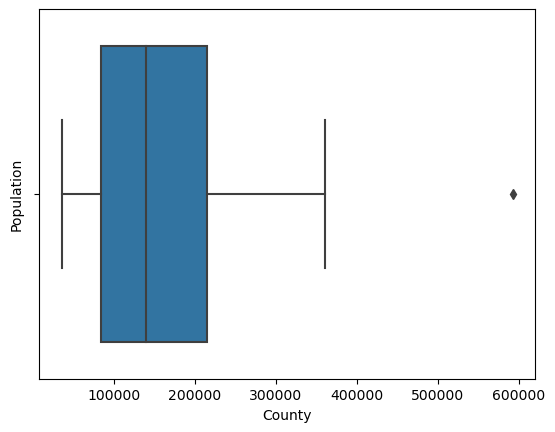

Calculating quartiles
Quartile 3 = 215181.0
Quartile 1 = 83782.0
IQR = 131399.0


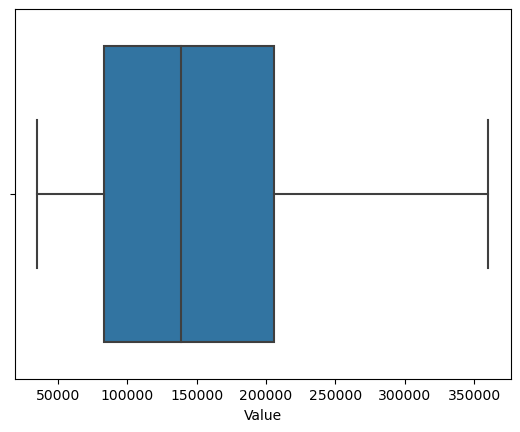

Outliers


,Year,Value
County,,
Dublin City,72792,592713


In [71]:
# Get outliers by Councils with plotboxes
get_outliers_by_feature(df_population_2022, "County")

##### Outliers by Age

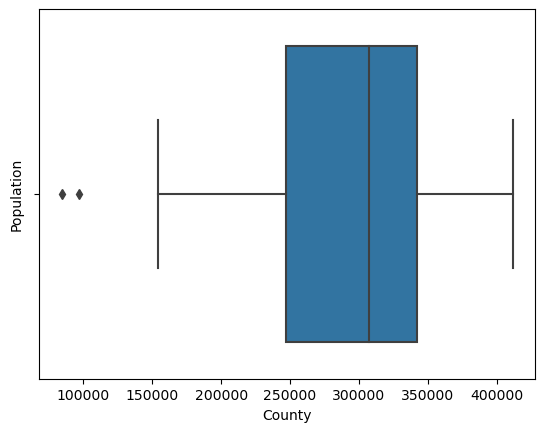

Calculating quartiles
Quartile 3 = 342003.25
Quartile 1 = 246775.5
IQR = 95227.75


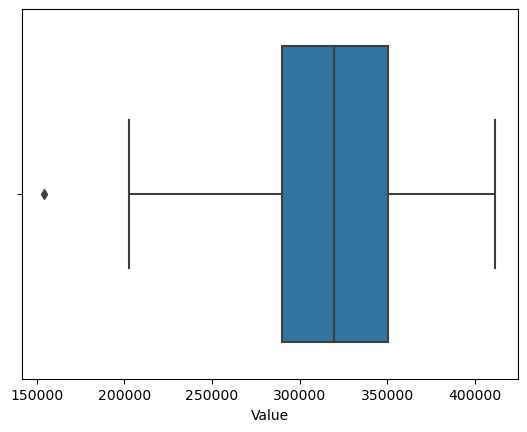

Outliers


,Year,Value
Age,,
Age 80-84,125364,96586
Age 85 and over,125364,84441


In [72]:
# Get outliers by Ages with plotboxes
get_outliers_by_feature(df_population_2022, "Age")

### Data preparation and Visualization
4. All design and implementation of your visualizations must be justified and detailed in full., referring to Tufts Principles [0-20]

#### 9. Plot different features against one another (scatter), against frequency (histogram)

### Statistics
1. Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

##### Population by Council

In [73]:
# Group by Council
df_population_2022_by_councils = df_population_2022.groupby('County').sum("Value")
# Sort by population
df_population_2022_by_councils.reset_index().sort_values('Value')

,County,Year,Value
15,Leitrim,72792,35199
17,Longford,72792,46751
0,Carlow,72792,61968
21,Monaghan,72792,65288
24,Sligo,72792,70198
23,Roscommon,72792,70259
1,Cavan,72792,81704
22,Offaly,72792,83150
10,Galway City,72792,84414
14,Laois,72792,91877


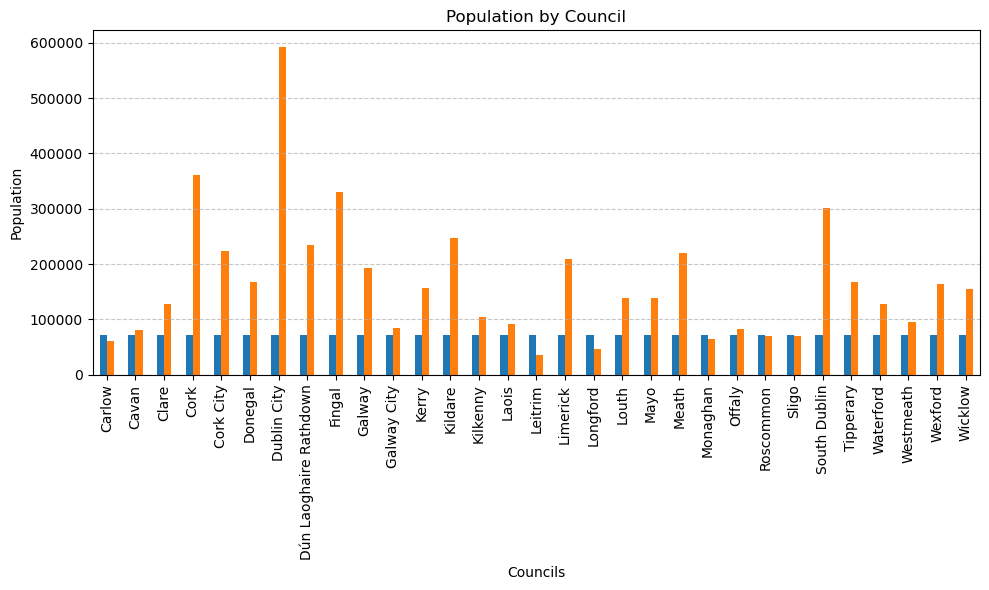

In [74]:
# Plotting the bar plot
df_population_2022_by_councils.plot(kind='bar', figsize=(10, 6), legend = False)
plt.title('Population by Council')
plt.xlabel('Councils')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Sex of Population by Council

In [75]:
df_council_sex = df_population_2022.groupby(["County","Sex"]).sum("Value").reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


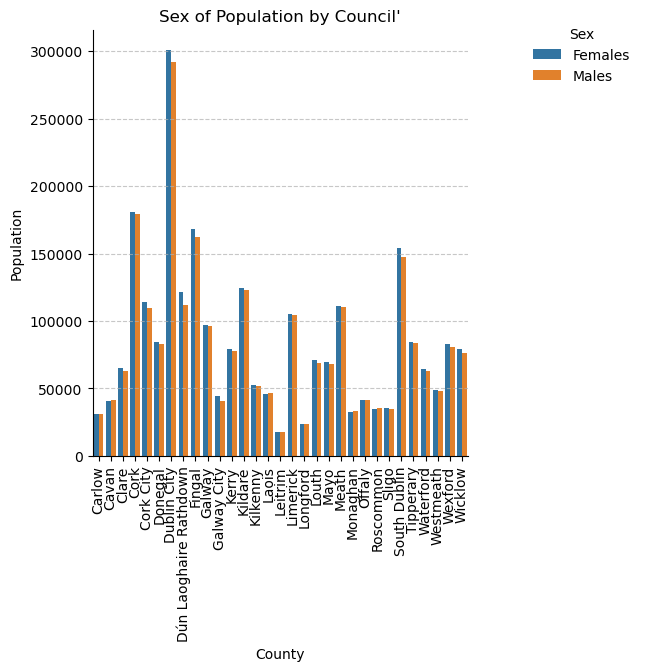

In [76]:
plotBarWithSeaborn(
    df_data = df_council_sex,
    x_name = "County",
    y_name = "Value",
    hue_ = "Sex",
    title = "Sex of Population by Council'",
    axis_x_name = "County",
    axis_y_name = "Population",
    rotation = True,
    legend_t = "Sex")

###### Age of Population by Sex

In [77]:
df_sex = df_population_2022.groupby(["Sex", "Age"]).sum("Value").reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


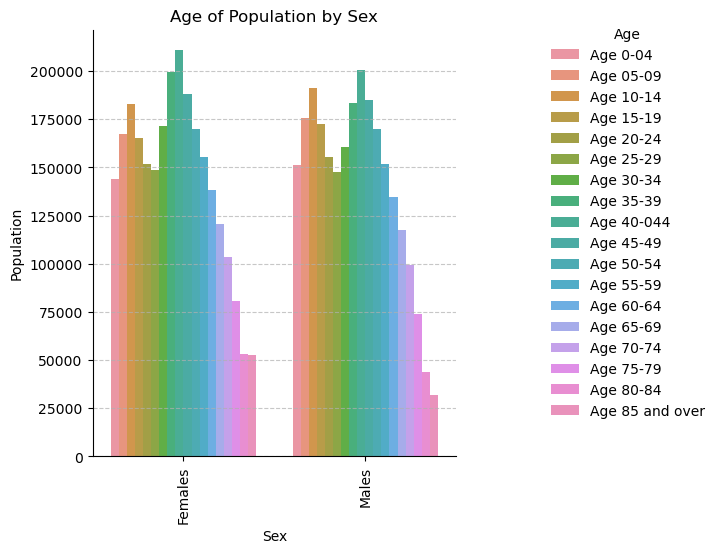

In [78]:
plotBarWithSeaborn(
    df_data = df_sex,    
    x_name = "Sex",
    y_name = "Value",
    title = "Age of Population by Sex",
    axis_x_name = "Sex",
    axis_y_name = "Population",
    rotation = True,
    hue_= "Age",
    legend_t = "Age",
)

### Heatmap for correlatives

Text(0.5, 1.0, 'Population by Age and Sex')

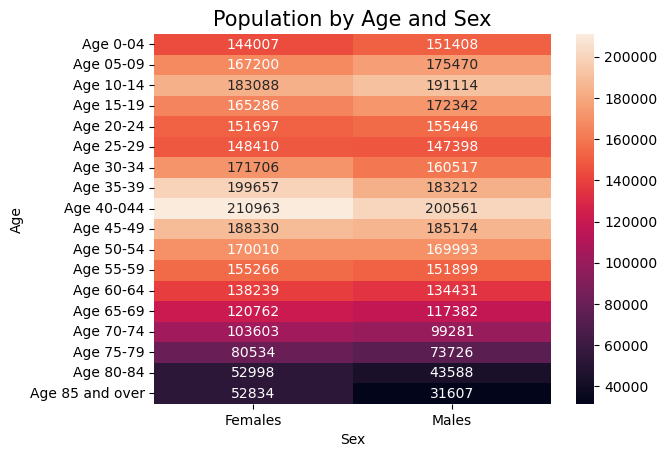

In [79]:
df_population_2022_test = df_population_2022.groupby(["Age", "Sex"]).sum("Value").reset_index()
df_population_2022_test = df_population_2022_test.pivot(index = "Age", columns="Sex", values="Value")

sns.heatmap(df_population_2022_test, annot=True,fmt="d")
plt.title("Population by Age and Sex", fontsize=15)

##### Sex of Population by Ages

In [80]:
df_age = df_population_2022.groupby(["Age"]).sum("Value").reset_index()
df_age

,Age,Year,Value
0,Age 0-04,125364,295415
1,Age 05-09,125364,342670
2,Age 10-14,125364,374202
3,Age 15-19,125364,337628
4,Age 20-24,125364,307143
5,Age 25-29,125364,295808
6,Age 30-34,125364,332223
7,Age 35-39,125364,382869
8,Age 40-044,125364,411524
9,Age 45-49,125364,373504


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


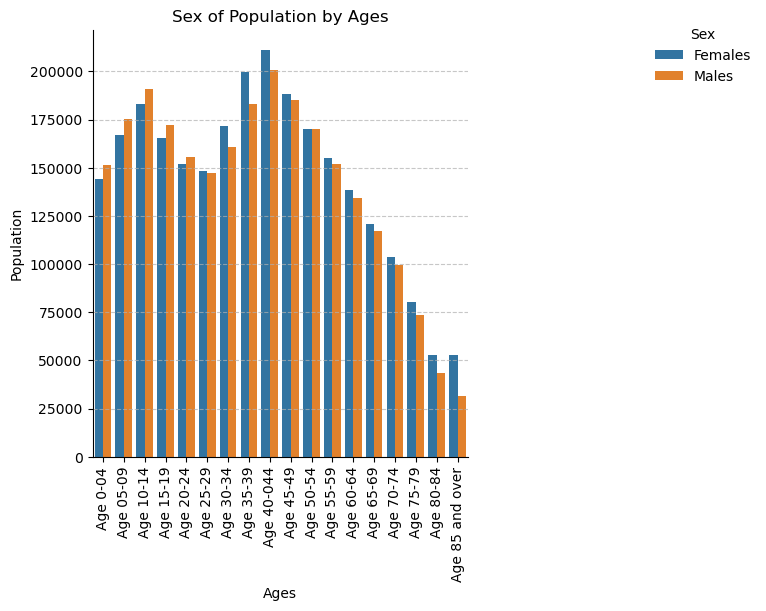

In [81]:
g = sns.catplot(
    x="Age",       # x variable name
    y="Value",       # y variable name
    hue="Sex",  # group variable name
    data=df_sex,     # dataframe to plot
    kind="bar",
)
plt.title('Sex of Population by Ages')
plt.xlabel('Ages')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
sns.move_legend(g, "upper center", bbox_to_anchor=(1.2, 1), title='Sex')
plt.show()

#### Scatterplot of Population

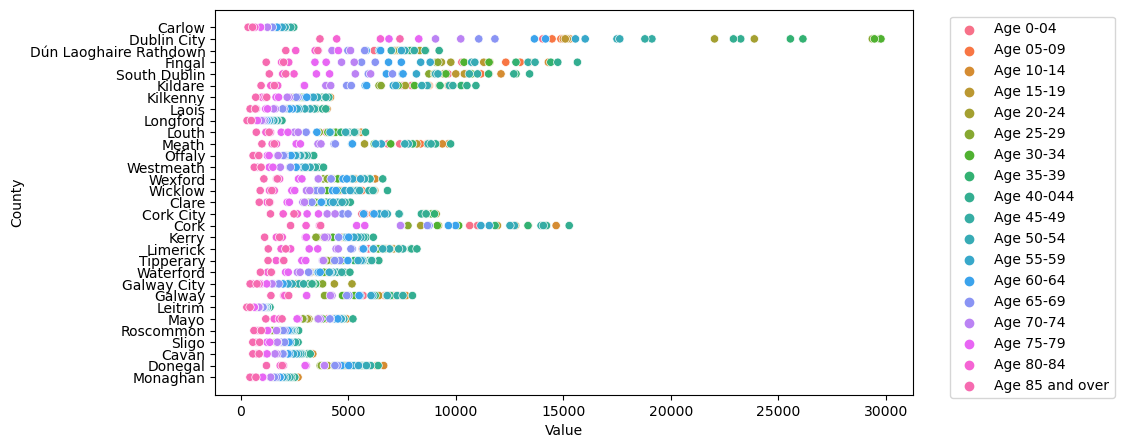

In [82]:
plt.figure(figsize=(9,5))
sns.scatterplot(data = df_population_2022, x= "Value", y ="County", hue="Age")
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))

# Statistic

2.- Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report.


## Case 1

What is the probability that if 3 people are chosen from the population, 2 of them will be girls?

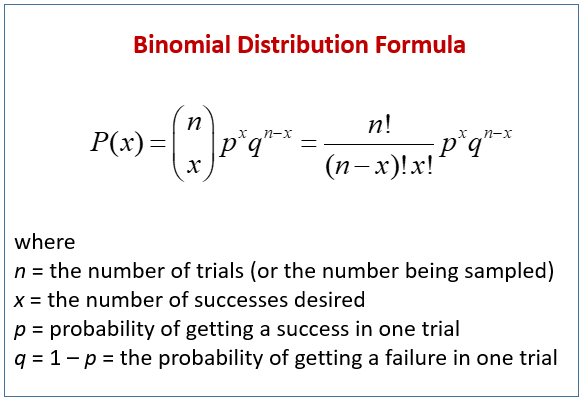

Solution:

- n = 3 people for choosing
- x = 2 girls
- We need to find  p = (total girls / total population)


In [83]:
total_population = df_age.Value.sum() 
print(f"We  have that the total  of the population is {total_population}")

We  have that the total  of the population is 5149139


We need to find total of girls

In [84]:
girl_ages = ["Age 0-04", "Age 05-09", "Age 10-14"]

In [85]:
total_girls = df_population_2022.loc[(df_population_2022["Sex"] == "Females") & (df_population_2022["Age"].isin(girl_ages))].Value.sum()
print(f"We  have that the total  of the girls is {total_girls}")

We  have that the total  of the girls is 494295


In [86]:
girl_probabilty = total_girls / total_population
print(f"Then p = {girl_probabilty}")

Then p = 0.09599566063374868


In [87]:
#probability of a specific number of successes (or failures) in a fixed number of independent trials, each with the same probability of success.
result = stats.binom.pmf(k = 2,        # Probability of k = 2 successes
                n = 3,                 # With 3 people
                p = girl_probabilty)   # And success probability

probability = round(result*100)
print(f"The probability to find 2 girls when we pick up 3 people is {probability}%")

The probability to find 2 girls when we pick up 3 people is 2%


Now we can show the distribution with a sample bigger and we noticed the distribution is not symmetric:

col_0         0       1      2   3
row_0                             
counts  5561035  427988  10889  88


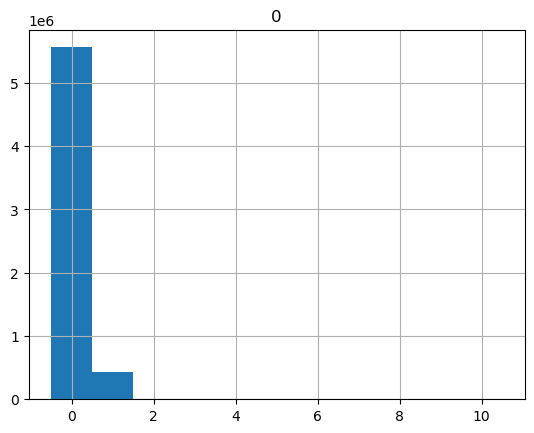

In [88]:
pick_up_2_girls = stats.binom.rvs(n = 3,               # Number of people choosen
                                  p = result,          # Success probability
                                  size = 6000000)      # Number of trials

print( pd.crosstab(index="counts", columns= pick_up_2_girls))

pd.DataFrame(pick_up_2_girls).hist(range=(-0.5,10.5), bins=11);

## Case 2

What is the probability that if 40 people are chosen from the population, 30 of them will be men?

Solution:

- n = 40 people for choosing
- x = 30 men
- We need to find  p = (total men / total population)


In [89]:
total_population = df_sex.Value.sum() 
print(f"We  have that the total  of the population is {total_population}")

We  have that the total  of the population is 5149139


We need to find total of men

In [90]:
total_men = df_population_2022.loc[(df_population_2022["Sex"] == "Males")].Value.sum()
print(f"We  have that the total  of the men is {total_men}")

We  have that the total  of the men is 2544549


In [91]:
men_probability = total_men / total_population 
print(f"Then p = {men_probability}")

Then p = 0.49416980198048643


In [92]:
#probability of a specific number of successes (or failures) in a fixed number of independent trials, each with the same probability of success.
result = stats.binom.pmf(k = 30,        # Probability of k = 30 successes
                n = 40,                 # With 40 people
                p = men_probability)   # And success probability

probability = round(result*100, 2)
print(f"The probability to find 2 girls when we pick up 3 people is {probability}%")

The probability to find 2 girls when we pick up 3 people is 0.06%


Now we can show the distribution with a sample bigger and we noticed the distribution is not symmetric

col_0         0       1     2   3
row_0                            
counts  9759438  237649  2896  17


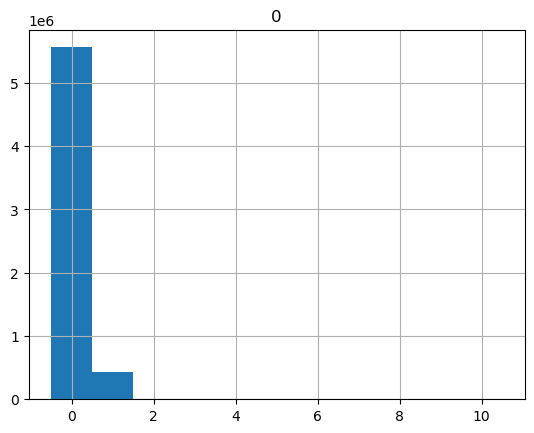

In [93]:
pick_up_30_men = stats.binom.rvs(n = 40,               # Number of people choosen
                                  p = result,          # Success probability
                                  size = 10000000)      # Number of trials

print( pd.crosstab(index="counts", columns= pick_up_30_men))

pd.DataFrame(pick_up_2_girls).hist(range=(-0.5,10.5), bins=11);

### Machine learning for Data Analytics
1. Explain which project management framework  (CRISP-DM, KDD or SEMMA) is required for a data science project. Discuss and justify with real-life scenarios. Provide an explanation of why you chose a supervised, unsupervised, or semi-supervised machine learning technique for the dataset you used for ML modeling. [0 - 20]

# test ini

# test end

### Data preparation and Visualization
2. You must also rationalise, justify, and detail all the methods used to prepare the data for ML (Scaling, Encoding, imputation etc…). [0-40]

### Data preparation and Visualization
3. Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. [0-20]

### Statistics
3. Use Normal distribution to explain or identify some information about your dataset. [0-20]

### Statistics
4. Explain the importance of the distributions used in point 3 and 4 in your analysis. Justify the choice of the variables and explain if the variables used for the discrete distributions could be used as normal distribution in this case. [0-15]

### Machine learning for Data Analytics
2. Machine learning models have a wide range of uses, including prediction, classification, and clustering. It is advised that you assess several approaches (at least two), choose appropriate hyperparameters for the optimal outcomes of Machine Learning models using an approach of hyperparameter tunning, such as GridSearchCV or RandomizedSearchCV. [0 - 30]

### Machine learning for Data Analytics
3. Show the results of two or more ML modeling comparisons in a table or graph format. Review and critically examine the machine learning models' performance based on the selected metric for supervised, unsupervised, and semi-supervised approaches. [0 - 30]

### Machine learning for Data Analytics
4. Demonstrate the similarities and differences between your Machine Learning modelling results using the tables or visualizations. Provide a report along with an explanation and interpretation of the relevance and effectiveness of your findings. [0 - 20]

### Programming  
2. In a dedicated section in your report, discuss your use of aspects of various programming paradigms in the development of your project. For example, this may include (but is not limited to) how they influenced your design decisions or how they helped you solve problems. Note that marks may not be awarded if the discussion does not involve your specific project. [0-50]